In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# GDP data reading and cleaning

In [171]:
gdp_path = '../../data/expenditure/expenditure_gdp.csv'
gdp = pd.read_csv(gdp_path)
gdp['REF_DATE'] = pd.to_datetime(gdp['REF_DATE'])
gdp.head(2)

C:\Users\sidhu\AppData\Local\Temp/ipykernel_17144/2999133702.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  gdp = pd.read_csv(gdp_path)


,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Final consumption expenditure,Dollars,81,millions,6,v62305723,1.1.1.1,273818.0,NaN,NaN,NaN,0
1,1961-01-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Household final consumption expenditure,Dollars,81,millions,6,v62305724,1.1.1.2,182300.0,NaN,NaN,NaN,0


### Extracted only required columns and rows

In [4]:
# filter data
gdp_subset = gdp[(gdp['REF_DATE'] >= '2004-01-01') &
                (gdp['Prices'] == 'Chained (2012) dollars') & 
                (gdp['Estimates'] == 'Gross domestic product at market prices') &
                 (gdp['UOM'] == 'Dollars')]
gdpts = gdp_subset[['REF_DATE', 'VALUE']]

# rename columns
gdpts = gdpts.rename(columns = {'REF_DATE': 'Date', 'VALUE': 'GDP'})

In [5]:
gdpts.head()

,Date,GDP
31505,2004-01-01,1566737.0
31688,2004-04-01,1585347.0
31871,2004-07-01,1604061.0
32054,2004-10-01,1615585.0
32237,2005-01-01,1621176.0


### Time series of GDP

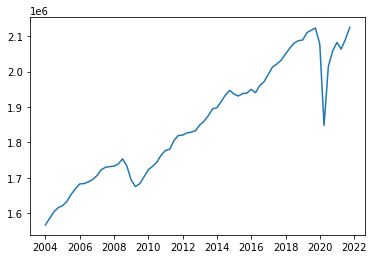

In [6]:
gdp_data = gdpts.copy()
gdp_data.index = gdpts['Date']
plt.plot(gdp_data['GDP'])
plt.show()

# Get predictors from Google Trends

In [136]:
# get caegories and keywords from csv file
key_path = '../../data/keywords_data/GDP.csv'
key_data = pd.read_csv(key_path)
cat_lst = key_data['CatNo']
key_data.head()
cat_lst = cat_lst[0:3]
cat_lst = [94]

In [160]:
pytrends = TrendReq(hl='en-US', backoff_factor=0.1)


def get_trends(keyword=[''], category='0', related_queries=0, related_topics=0):
    """ function to get the google trend for desired keyword and category"""
    kw_list = keyword
    cat = category
    timeframe = '2022-01-10 2022-04-01'
    geo = 'CA'
    gprop = ''

    try:
        pytrends.build_payload(kw_list, cat, timeframe, geo, gprop)
        # get time series
        data = pytrends.interest_over_time()
    except:
        print(f"Category {cat} does not exist")
        return [''], [''], ['']

    # get related queries
    try:
        if related_queries > 0:
            queries = pytrends.related_queries()
            queries_lst = list(queries['']['top']['query'].values[0:related_queries])
        else:
            queries_lst = ['']
    except:
        queries_lst = ['']

    # get related topics
    try:
        if related_topics > 0:
            topics = pytrends.related_topics()
            topics_lst = list(topics['']['top']['topic_title'].values[0:related_topics])
        else:
            topics_lst = ['']
    except:
        topics_lst = ['']
    return data, queries_lst, topics_lst

In [163]:
cat_queries_dict = {}
cat_topics_dict = {}

# get time series and related queries and topics of categories
for i, category in enumerate(cat_lst):
    category = str(category)
    data1, queries, topics = get_trends(category=category, related_queries=2, related_topics=2)
    cat_queries_dict[category] = queries
    cat_topics_dict[category] = topics

In [166]:
key_data.head()

,CatNo,Category,Keywords,keywordCat,keywordCatNo
0,569,Events & Listings,Economic crisis,Economics,520
1,23,Performing Arts,Crisis,Economics,520
2,47,Autos & Vehicles,Recession,Economics,520
3,815,Vehicle Brands,Financial crisis,Economics,520
4,170,Vehicle Licensing & Registration,Krach,Economics,520


In [170]:
keywords_lst = key_data['Keywords'].dropna()
keycat_lst = key_data['keywordCat'].dropna()

keywords_queries_dict = {}
keywords_topics_dict = {}

# get time series and related queries and topics of selected keywords
for i, category in enumerate(cat_lst):
    category = str(category)
    data1, queries, topics = get_trends(keyword = ['recession'], related_queries=2, related_topics=2)
    cat_queries_dict[category] = queries
    cat_topics_dict[category] = topics

In [174]:
keywords_lst

0           Economic crisis
1                    Crisis
2                 Recession
3          Financial crisis
4                     Krach
5              Unemployment
6     Unemployment benefits
7              Student loan
8                      Loan
9                  Interest
10                 Mortgage
11           Auto Financing
12                 Birthday
13           Temporary jobs
14       Affordable housing
15                   Lawyer
16              public debt
17             office space
18           Housing bubble
19               Bankruptcy
20              Exportation
21      Commercial Building
22              Foreclosure
Name: Keywords, dtype: object

### Plot trends

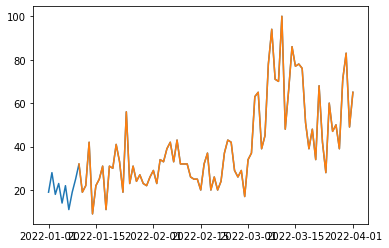

In [164]:
trend_data = data.copy()
temp = pd.DataFrame({'A': data['recession'], 'B':data1['recession']})
plt.plot(temp)
plt.show()

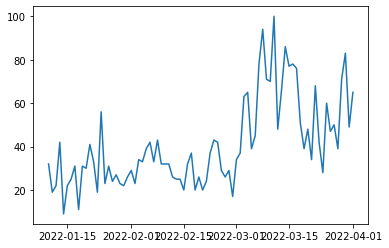

In [153]:
trend_data = data.copy()
plt.plot(trend_data['recession'])
plt.show()

In [12]:
kw_list = ['']
cat = '22'
timeframe = '2004-01-01 2022-01-01'
geo = 'CA'
gprop = ''

pytrends.build_payload(kw_list, cat, timeframe, geo, gprop)
data = pytrends.interest_over_time()

In [12]:
pytrends.suggestions("Economic crisis")

[{'mid': '/g/1211cg58', 'title': 'economic crisis', 'type': 'Topic'},
 {'mid': '/g/11q2xlm4ss',
  'title': '2019–present Sri Lankan economic crisis',
  'type': 'Event'},
 {'mid': '/m/080pqzt',
  'title': '1998–1999 Ecuador economic crisis',
  'type': 'Topic'},
 {'mid': '/g/11bwdr23n9',
  'title': '2013–present economic crisis in Venezuela',
  'type': 'Topic'},
 {'mid': '/m/05p85kd',
  'title': '1991 Indian economic crisis',
  'type': 'Topic'}]